### <h1> Task 3 <h1> (Одновременное заполнение векторов и подсчёт их скалярного произведения при помощи sections)

In [25]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot, time_thread_plot, speedup_plot

In [26]:
data_sections = pd.read_csv('data/scalar_sections.csv')
data_reduction = pd.read_csv('data/scalar_reduction.csv')
display(data_sections)
display(data_reduction)

,Num_Threads,Iter,Time
0,1,10,60.5
1,1,100,14.0
2,1,1000,18.8
3,1,10000,85.5
4,1,100000,781.2
...,...,...,...
91,16,100,18.7
92,16,1000,27.6
93,16,10000,158.9
94,16,100000,1098.9


,Num_Threads,Iter,Time
0,1,10,55
1,2,10,47
2,3,10,38
3,4,10,44
4,5,10,37
...,...,...,...
91,12,1000000,2307
92,13,1000000,2212
93,14,1000000,1999
94,15,1000000,1843


In [27]:
labels = ['Sections', 'Reduction']

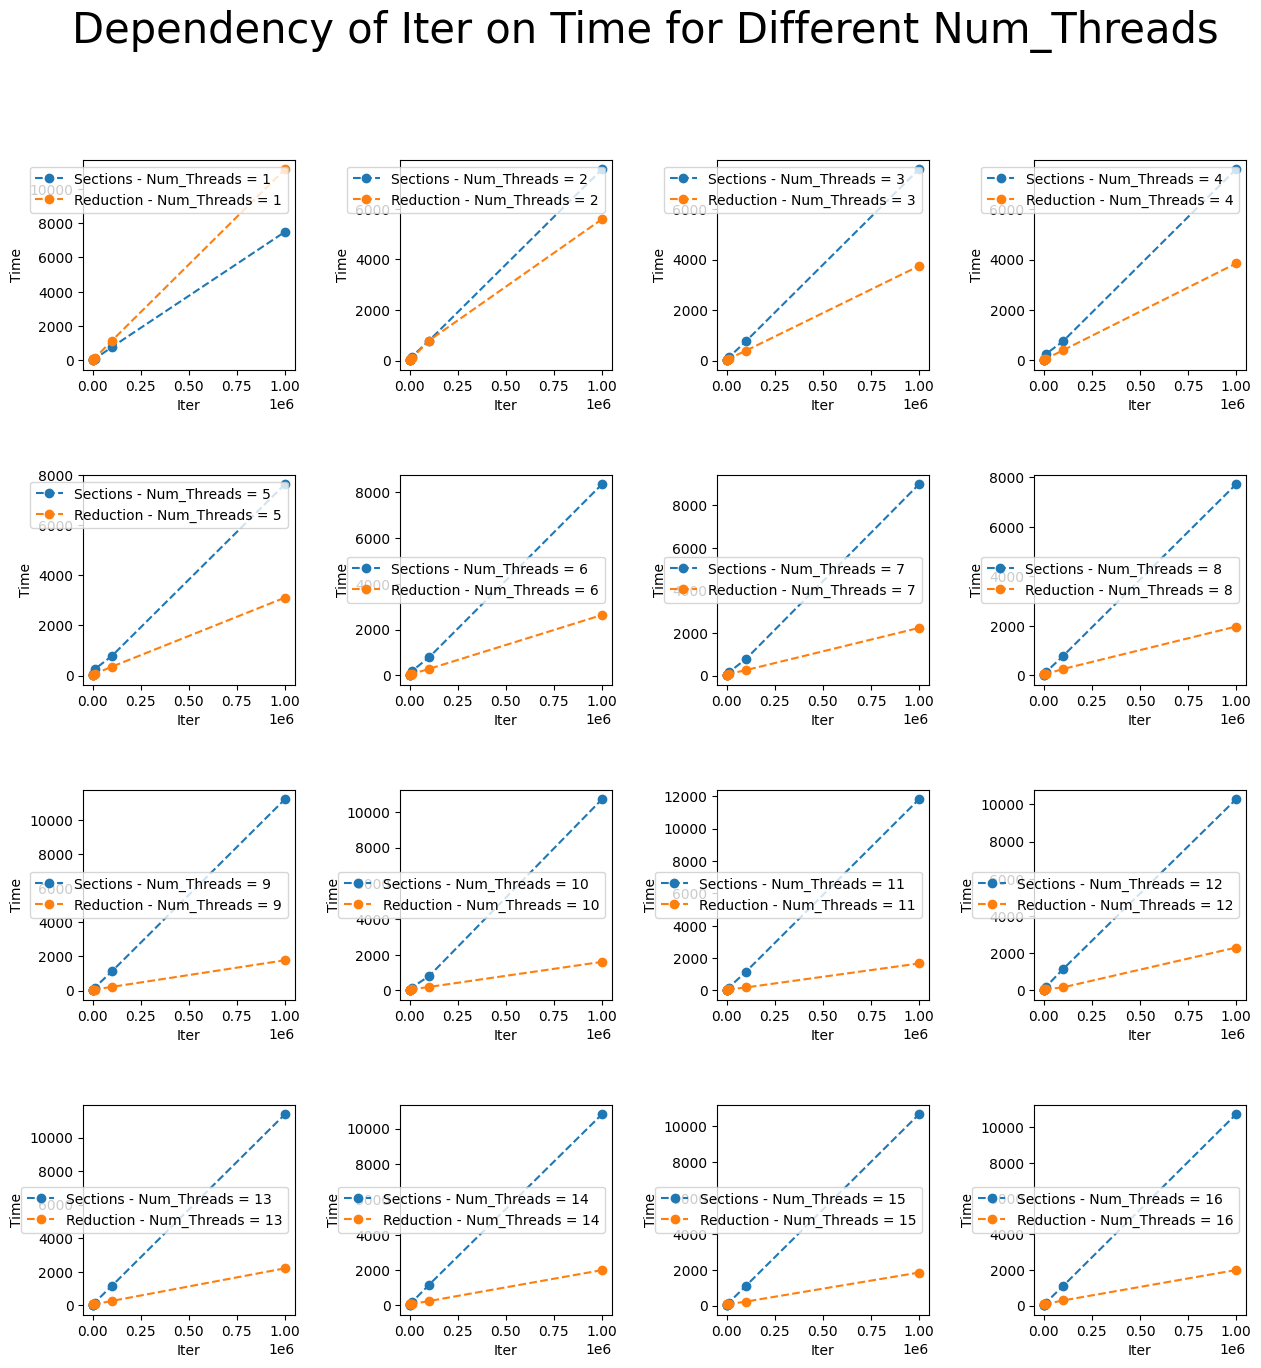

In [28]:
thread_groups_atomic = data_sections.groupby('Num_Threads')
thread_groups_reduction = data_reduction.groupby('Num_Threads')

thread_groups = [thread_groups_atomic, thread_groups_reduction]
time_iter_plot(thread_groups, labels)

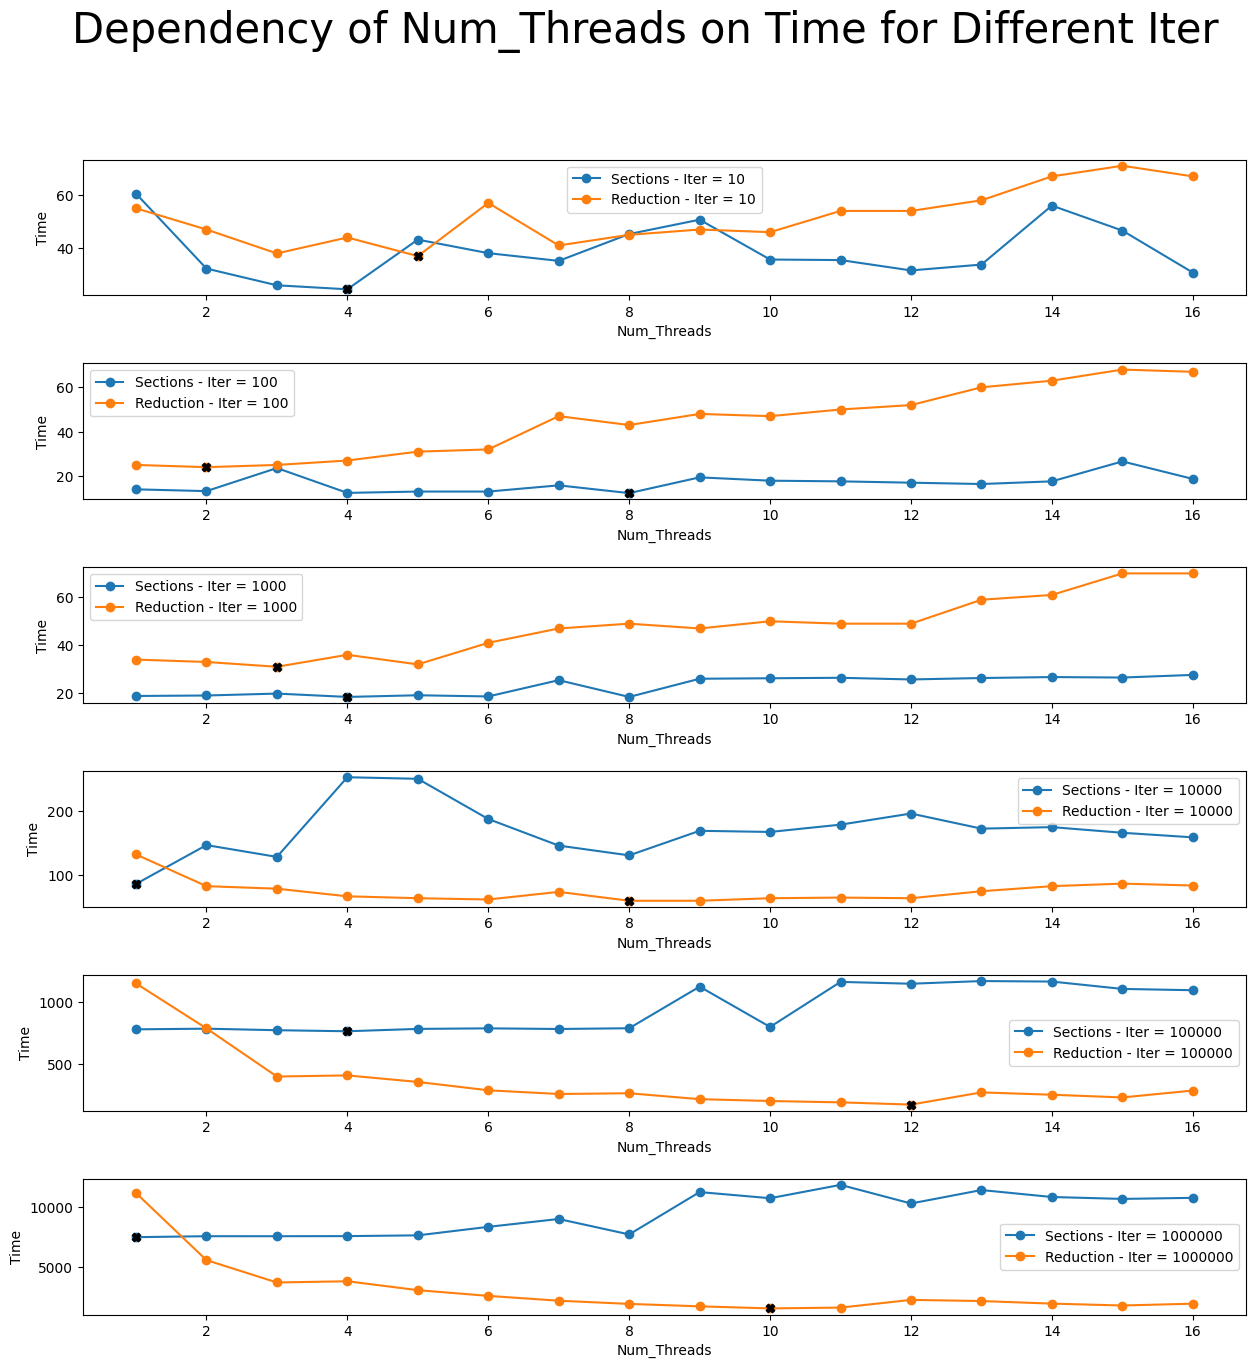

In [29]:
iter_groups_atomic = data_sections.groupby('Iter', as_index=False)
iter_groups_reduction = data_reduction.groupby('Iter', as_index=False)

iter_groups = [iter_groups_atomic, iter_groups_reduction]
time_thread_plot(iter_groups, labels)

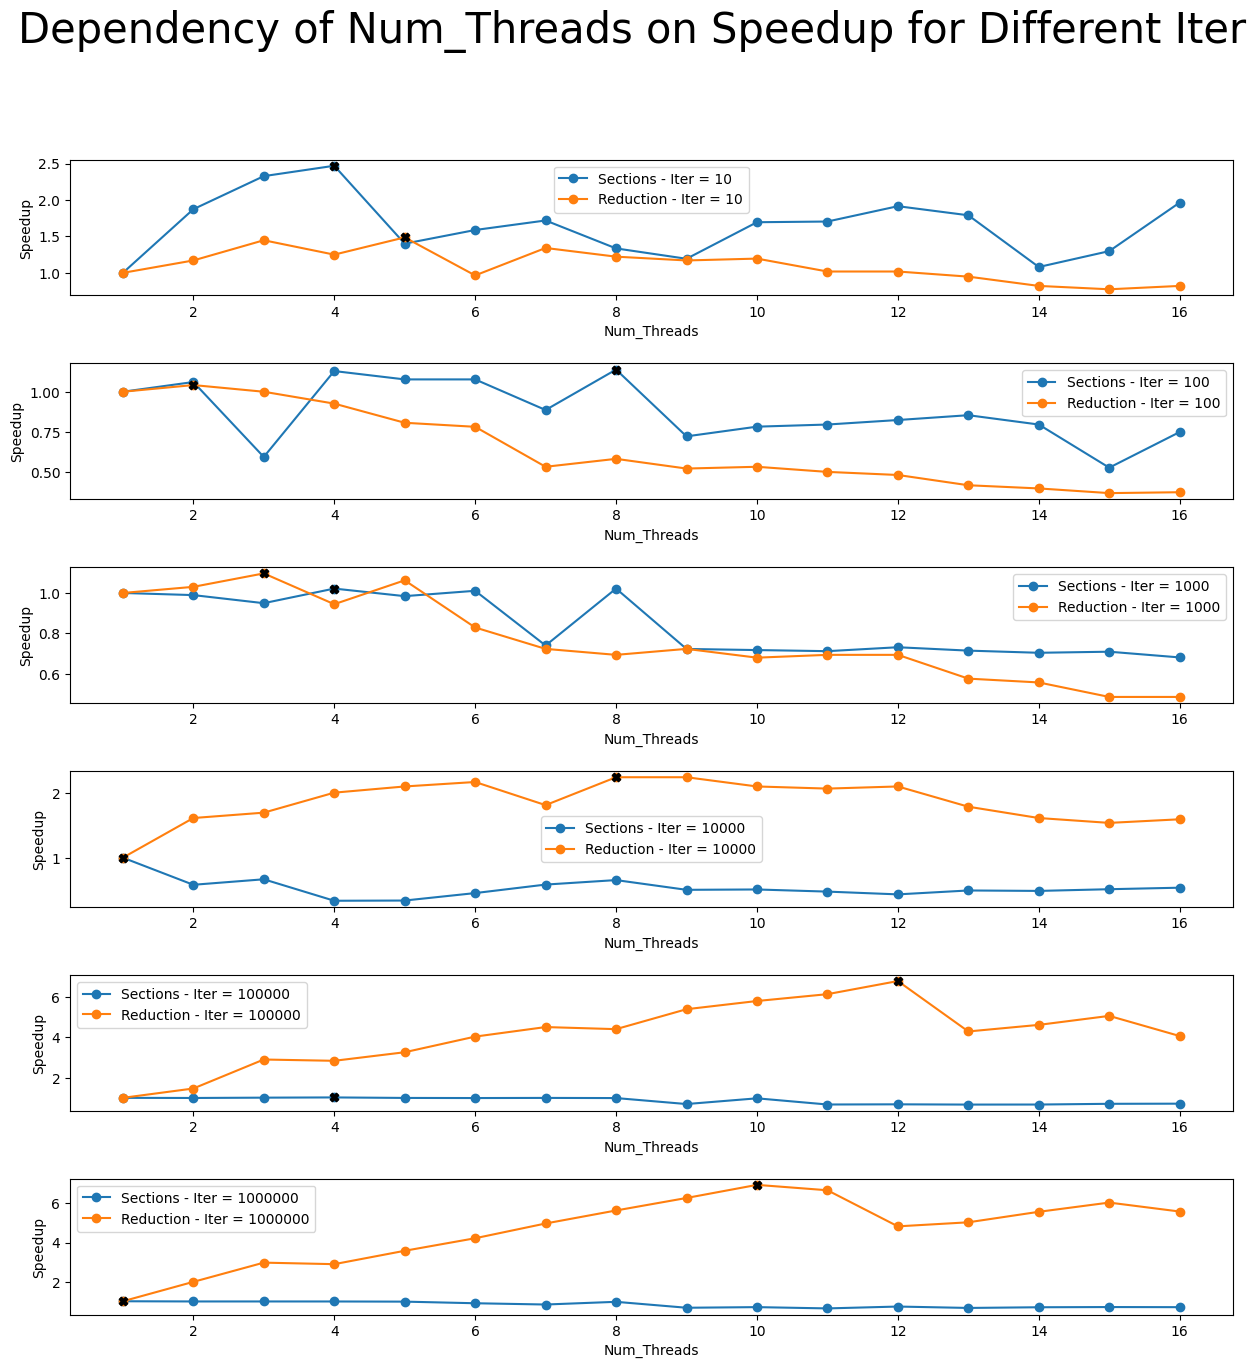

In [30]:
speedup_plot(iter_groups, labels)

# Вывод:
Из представленных графиков можно сделать вывод, что несмотря на параллельную работу секций: заполнение векторов и подсчёт их скалярного произведения - они работают на одной вычислительной машине, тем самым деля доступные ресурсы, в то время как засекаемое время редукция было произведено только для задачи скалярного произведения(без заполнения векторов случайными значениями).
***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 